# Intro to `jeepr` with `gprMax` data

`jeepr` is a set of utilities for handling GPR data, especially `gprMax` models and synthetics, and real data from USRadar instruments.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import jeepr
jeepr.__version__

'0.1.2'

## Make `Scan` from a `gprMax` simulation `.out` file

In [4]:
from jeepr import Scan

g = Scan.from_gprmax('/Volumes/ageo3/GPR_simulation/nov14/MH_2017-11-14_11.53.30.952093_470MHz1.out')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [7]:
g.__dict__

{'domain': 'time',
 'dt': 1.1793271683748419e-11,
 'dx': 0.01,
 'dz': 0,
 'freq': 500000000.0,
 'log': ['loaded from out'],
 'meta': {'nrx': 1},
 'name': '',
 't0': 0.0,
 'x0': 0.1}

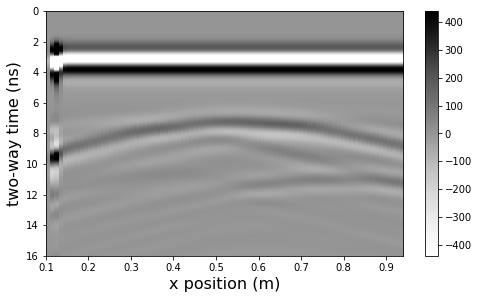

In [8]:
g.plot()

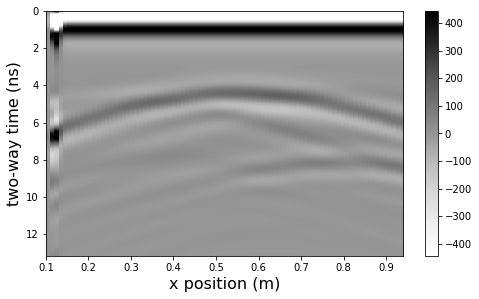

In [9]:
t0 = np.sqrt(2) / float(g.freq)
h = g.crop(t=t0)
h.plot()

In [10]:
h.shape

(1118, 85)

In [11]:
h.log

['loaded from out', 'crop at t = 2.83 ns']

Note, however, that the `t0` of the section has been reset to 0 ns. 

In [12]:
h.t0

0.0

Let's look at a spectrum; it looks quite different from real data.

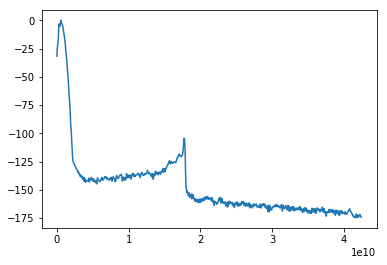

In [13]:
f, p = g.get_spectrum()

plt.plot(f, p)

## Make `Model` from `gprMax` VTI file

In [6]:
from jeepr import Model

In [8]:
m = Model.from_gprMax('/Volumes/ageo3/GPR_simulation/nov14/MH_2017-11-14_11.53.30.952093_470MHz.in')

ValueError: not enough values to unpack (expected 1, got 0)

In [9]:
m = Model.from_gprMax_vti('/Volumes/ageo3/GPR_simulation/nov14/MH_2017-11-14_11.53.30.952093_470MHz.vti')

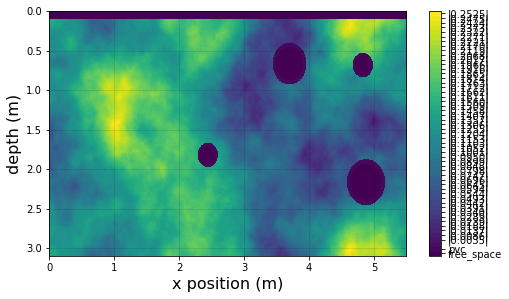

In [10]:
m.plot()

In [11]:
m.__dict__

{'domain': 'depth',
 'dt': 0,
 'dx': 0.005,
 'dx_dy_dz': (0.005, 0.005, 0.005),
 'dz': 0.005,
 'materials': [{'name': 'pec', 'value': 0},
  {'name': 'free_space', 'value': 1},
  {'name': 'pvc', 'value': 2},
  {'name': 'water', 'value': 3},
  {'name': '|0.0035|', 'value': 4},
  {'name': '|0.0086|', 'value': 5},
  {'name': '|0.0137|', 'value': 6},
  {'name': '|0.0188|', 'value': 7},
  {'name': '|0.0239|', 'value': 8},
  {'name': '|0.0289|', 'value': 9},
  {'name': '|0.0340|', 'value': 10},
  {'name': '|0.0391|', 'value': 11},
  {'name': '|0.0442|', 'value': 12},
  {'name': '|0.0493|', 'value': 13},
  {'name': '|0.0544|', 'value': 14},
  {'name': '|0.0594|', 'value': 15},
  {'name': '|0.0645|', 'value': 16},
  {'name': '|0.0696|', 'value': 17},
  {'name': '|0.0747|', 'value': 18},
  {'name': '|0.0798|', 'value': 19},
  {'name': '|0.0848|', 'value': 20},
  {'name': '|0.0899|', 'value': 21},
  {'name': '|0.0950|', 'value': 22},
  {'name': '|0.1001|', 'value': 23},
  {'name': '|0.1052|', 'va

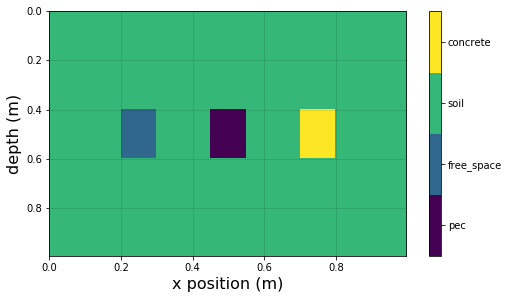

In [18]:
ground = m.rx['position'][0]
n = m.crop(z=ground)
n.plot()

## Plot `Model` and `Scan` together in time domain

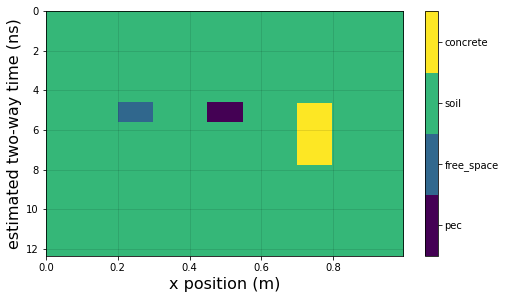

In [19]:
n_time, _ = n.to_time(dt=5e-11)
n_time.plot()

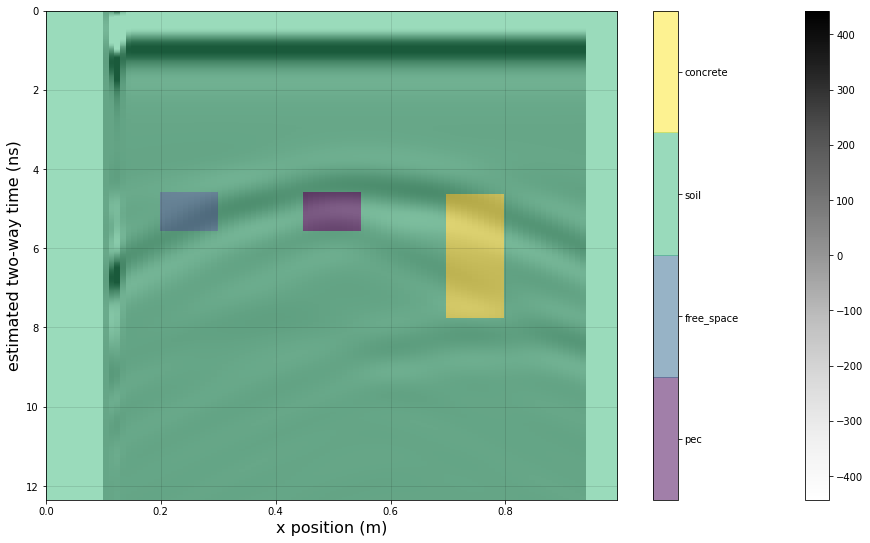

In [20]:
fig = plt.figure(figsize=(16, 9))

ax0 = fig.add_subplot(111)
ax0 = h.plot(ax=ax0)
ax0 = n_time.plot(ax=ax0, alpha=0.5)

plt.show()

## Plot `Model` and `Scan` together in depth

This doesn't make sense on an unmigrated gather.